<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1">Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Missing-data" data-toc-modified-id="Missing-data-1.1">Missing data</a></span></li></ul></li><li><span><a href="#A-Quick-EDA" data-toc-modified-id="A-Quick-EDA-2">A Quick EDA</a></span><ul class="toc-item"><li><span><a href="#Examine-the-endogenous-(dependent)-variable---VIQ" data-toc-modified-id="Examine-the-endogenous-(dependent)-variable---VIQ-2.1">Examine the endogenous (dependent) variable - VIQ</a></span></li><li><span><a href="#What-do-our-exogenous-(independent)-variables-look-like?" data-toc-modified-id="What-do-our-exogenous-(independent)-variables-look-like?-2.2">What do our exogenous (independent) variables look like?</a></span></li></ul></li></ul></div>

Abstract: Are the size and weight of your brain indicators of your mental capacity? <p>
In this study by Willerman et al. (1991) the researchers use Magnetic
Resonance Imaging (MRI) to determine the brain size of the subjects. The
researchers take into account gender and body size to draw conclusions about the
connection between brain size and intelligence.<p>
Dependent variable is VIQ
1. Gender: Male or Female
2. FSIQ: Full Scale IQ scores based on the four Wechsler (1981) subtests
3. VIQ: Verbal IQ scores based on the four Wechsler (1981) subtests
4. PIQ: Performance IQ scores based on the four Wechsler (1981) subtests
5. Weight: body weight in pounds
6. Height: height in inches
7. MRI_Count: total pixel Count from the 18 MRI scans

Statsmodels uses a statistical terminology: the y variable in statsmodels is called ‘endogenous’ while the x variable is called exogenous. This is discussed in more detail here.

To simplify, y (endogenous) is the value you are trying to predict, while x (exogenous) represents the features you are using to make the prediction.



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [3]:
brain = pd.read_csv('/Users/jimcody/Documents/2021Python/statistics/data/brain_sizeM.csv')
brain.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,class,major
0,Female,133,132,124,118.0,64.5,816932,F,STEM
1,Male,140,150,124,NaN,72.5,1001121,S,Business
2,Male,139,123,150,143.0,73.3,1038437,J,Art
3,Male,133,129,128,172.0,68.8,965353,Sr,STEM
4,Female,137,132,134,147.0,65.0,951545,S,Business


In [12]:
print(brain.shape)
print()
print(brain.columns)
print()
print(brain.dtypes)
print()
print(brain.index)

(40, 9)

Index(['Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count',
       'class', 'major'],
      dtype='object')

Gender        object
FSIQ           int64
VIQ            int64
PIQ            int64
Weight       float64
Height       float64
MRI_Count      int64
class         object
major         object
dtype: object

RangeIndex(start=0, stop=40, step=1)


In [14]:
brain.columns= brain.columns.str.lower()

In [15]:
brain.describe()

,fsiq,viq,piq,weight,height,mri_count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


## Data Cleaning

In [ ]:
# No datatypes to change
# No columns need to be dropped
# Name changes were taken care of above
# No additional columns need to be created (at this time)

### Missing data

In [17]:
brain.isnull().sum()

gender       0
fsiq         0
viq          0
piq          0
weight       2
height       1
mri_count    0
class        0
major        0
dtype: int64

In [18]:
brain['weight'].fillna((brain['weight'].mean()), inplace=True)
brain['height'].fillna((brain['height'].mean()), inplace=True)

## A Quick EDA

### Examine the endogenous (dependent) variable - VIQ

In [20]:
brain.viq.describe()

count     40.000000
mean     112.350000
std       23.616107
min       71.000000
25%       90.000000
50%      113.000000
75%      129.750000
max      150.000000
Name: viq, dtype: float64

/opt/anaconda3/envs/NLP_code/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of VIQ')

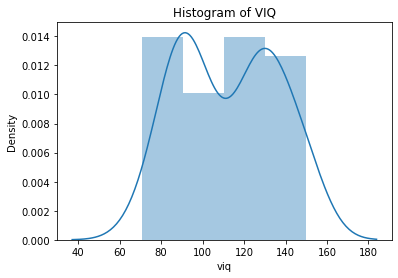

In [27]:
sns.distplot(brain['viq'], kde = True).set_title('Histogram of VIQ')

Index(['gender', 'fsiq', 'viq', 'piq', 'weight', 'height', 'mri_count',
       'class', 'major'],
      dtype='object')

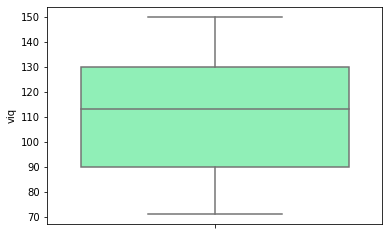

In [29]:
sns.boxplot(y="viq", data=brain,palette='rainbow')
brain.columns

<AxesSubplot:xlabel='gender', ylabel='viq'>

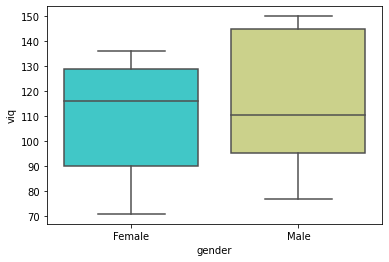

In [28]:
sns.boxplot(x='gender', y='viq', data=brain,palette='rainbow')

<AxesSubplot:xlabel='class', ylabel='viq'>

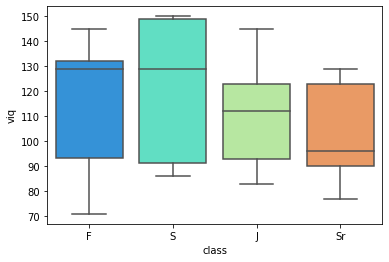

In [32]:
sns.boxplot(x='class', y='viq', data=brain,palette='rainbow')

<AxesSubplot:xlabel='major', ylabel='viq'>

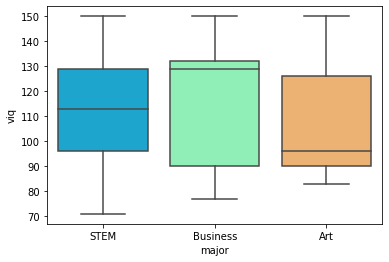

In [33]:
sns.boxplot(x='major', y='viq', data=brain,palette='rainbow')

### What do our exogenous (independent) variables look like?

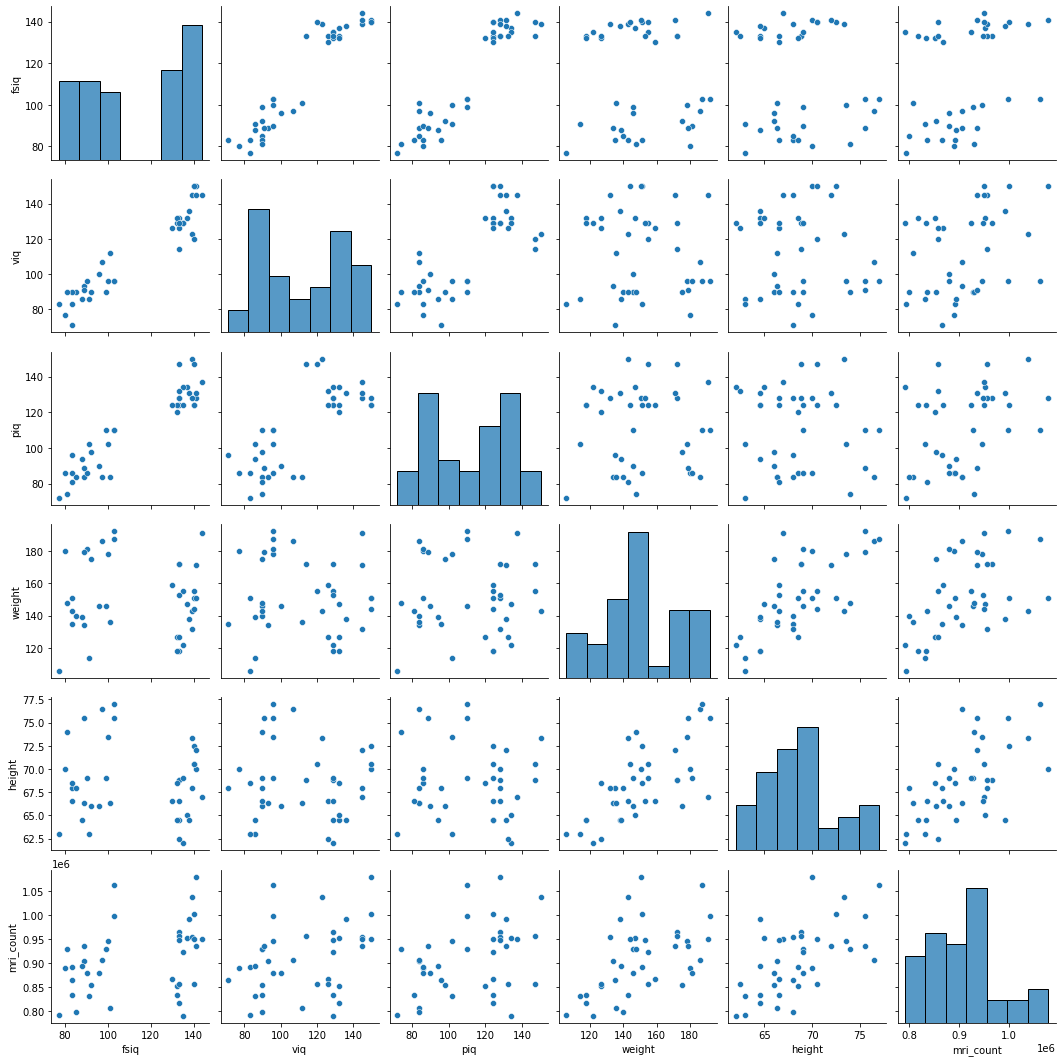

In [36]:
sns.pairplot(data = brain)

In [ ]:
 stats.ttest_ind(df['bp_after'][df['sex'] == 'Male'],                 
                 df['bp_after'][df['sex'] == 'Female'])

In [ ]:
brain.groupby('Gender').mean()

In [ ]:
sns.pairplot(data = brain, hue = 'Gender')

In [ ]:
stats.ttest_1samp(brain['VIQ'], 0) 

In [ ]:
female_viq = brain[brain['Gender'] == 'Female']['VIQ']
male_viq = brain[brain['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)   

In [ ]:
stats.ttest_ind(brain['FSIQ'], df['PIQ']) 

In [4]:
brain.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,class,major
0,Female,133,132,124,118.0,64.5,816932,F,STEM
1,Male,140,150,124,NaN,72.5,1001121,S,Business
2,Male,139,123,150,143.0,73.3,1038437,J,Art
3,Male,133,129,128,172.0,68.8,965353,Sr,STEM
4,Female,137,132,134,147.0,65.0,951545,S,Business


In [6]:
brain.columns= brain.columns.str.lower()

In [8]:
model = sm.OLS.from_formula('fsiq ~ viq+piq+weight+height', data=brain)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   fsiq   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1618.
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           2.40e-37
Time:                        10:31:56   Log-Likelihood:                -73.498
No. Observations:                  38   AIC:                             157.0
Df Residuals:                      33   BIC:                             165.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.5847      6.003     -1.597      0.1

In [9]:
model = sm.OLS.from_formula('fsiq ~ viq+piq', data=brain)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   fsiq   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3690.
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           2.59e-43
Time:                        10:32:20   Log-Likelihood:                -77.500
No. Observations:                  40   AIC:                             161.0
Df Residuals:                      37   BIC:                             166.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.9411      1.466     -6.779      0.0

In [10]:
model = sm.OLS.from_formula('fsiq ~ viq', data=brain)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   fsiq   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     327.8
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           2.79e-20
Time:                        10:32:36   Log-Likelihood:                -138.22
No. Observations:                  40   AIC:                             280.4
Df Residuals:                      38   BIC:                             283.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9967      6.118      0.817      0.4

In [11]:
model = sm.OLS.from_formula('fsiq ~ piq', data=brain)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   fsiq   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     260.2
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           1.37e-18
Time:                        10:32:46   Log-Likelihood:                -142.30
No. Observations:                  40   AIC:                             288.6
Df Residuals:                      38   BIC:                             292.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3034      7.026      0.328      0.7